# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

## ⚠️ Important Notice

**This notebook was AI-generated and has not been fully verified by human experts. Please be cautious when interpreting the code or results.**

The purpose of this notebook is to help you explore Dandiset 001375, which contains data from a pilot study investigating the effect of disrupting septal GABAergic activity using DREADDs on hippocampal and neocortical activity. However, any observations, interpretations, or conclusions drawn should be verified independently.

## Overview of the Dandiset

This notebook explores [Dandiset 001375: Septum GABA disruption with DREADDs](https://dandiarchive.org/dandiset/001375), which contains electrophysiological data from experiments investigating how disrupting septal GABAergic activity affects hippocampal and neocortical activity.

The dataset includes recordings from mice running laps in a virtual hallway, with electrodes placed in the ventral hippocampus and visual cortex. The experiments involved using DREADDs (Designer Receptors Exclusively Activated by Designer Drugs) to suppress GABA interneurons in the medial septum.

This dataset was contributed by Michael Eckert, Bruce McNaughton, and Janina Ferbinteanu as part of NIH Brain research.

## What We'll Cover in This Notebook

In this notebook, we will:

1. Connect to the DANDI archive and retrieve metadata about the dataset
2. List and explore the NWB files in the dataset
3. Examine the structure of a selected NWB file
4. Explore and visualize the electrophysiological data
5. Analyze trial structure and spiking activity
6. Create visualizations to better understand the data

By the end of this notebook, you should have a clear understanding of how to access and work with this dataset for your own analyses.

## Required Packages

The following packages are required to run this notebook:

- `dandi`: For accessing the DANDI archive
- `pynwb`: For working with Neurodata Without Borders (NWB) files
- `h5py`: For working with HDF5 files (the underlying format of NWB files)
- `remfile`: For streaming remote files
- `numpy`: For numerical computations
- `pandas`: For data manipulation and analysis
- `matplotlib`: For plotting and visualization
- `seaborn`: For enhanced visualization

In [1]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
from datetime import datetime
import time

# Set up plotting
sns.set_theme()

## Connecting to the DANDI Archive

First, we'll connect to the DANDI archive and retrieve information about Dandiset 001375.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001375")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset ID: {metadata['identifier']}")
print(f"Dandiset URL: https://dandiarchive.org/dandiset/001375")
print(f"Dandiset description: {metadata['description']}")

# Handle contributors (which could be strings or dictionaries)
print("Contributors:")
for contributor in metadata['contributor']:
    if isinstance(contributor, str):
        print(f"  - {contributor}")
    elif isinstance(contributor, dict) and 'name' in contributor:
        print(f"  - {contributor['name']}")
    else:
        print(f"  - {contributor}")

print(f"Version: {metadata['version']}")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset ID: DANDI:001375
Dandiset URL: https://dandiarchive.org/dandiset/001375
Dandiset description: Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity
Contributors:
  - Eckert, Michael
  - NIH Brain
  - McNaughton, Bruce
  - Ferbinteanu, Janina
Version: 0.250406.1855


## Exploring Assets in the Dandiset

Now let's list the assets (NWB files) available in this Dandiset.

In [3]:
# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")

# Create a DataFrame to display asset information
asset_data = []
for asset in assets:
    size_mb = asset.size / (1024 * 1024)  # Convert bytes to MB
    size_gb = size_mb / 1024  # Convert MB to GB
    asset_data.append({
        'Path': asset.path,
        'ID': asset.identifier,
        'Size (GB)': round(size_gb, 2)
    })

asset_df = pd.DataFrame(asset_data)
asset_df


Found 3 assets in the dataset


,Path,ID,Size (GB)
0,sub-MS13B/sub-MS13B_ses-20240725T190000_ecephy...,ce525828-8534-4b56-9e47-d2a34d1aa897,51.20
1,sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12...,376dc673-611b-4521-b135-9ec01c7f4f74,64.68
2,sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ar...,fea95c0e-2f07-49a3-b607-4b7e9f278e16,65.00


## Selecting an NWB File for Analysis

For this demonstration, we'll focus on the first NWB file in the dataset: `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`. This file contains electrophysiological data from subject MS13B during a session on July 25, 2024.

Let's load this NWB file and explore its contents:

In [4]:
# Select the first NWB file
selected_asset = asset_df.iloc[0]
print(f"Selected asset: {selected_asset.Path}")
print(f"Asset ID: {selected_asset.ID}")
print(f"Asset size: {selected_asset['Size (GB)']} GB")

# Construct the URL for the selected asset
asset_url = f"https://api.dandiarchive.org/api/assets/{selected_asset.ID}/download/"
print(f"Asset URL: {asset_url}")

# Create a link to Neurosift for exploring the NWB file
neurosift_url = f"https://neurosift.app/nwb?url={asset_url}&dandisetId=001375&dandisetVersion=draft"
print(f"Neurosift URL: {neurosift_url}")

Selected asset: sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
Asset ID: ce525828-8534-4b56-9e47-d2a34d1aa897
Asset size: 51.2 GB
Asset URL: https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/
Neurosift URL: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft


You can explore this NWB file interactively using Neurosift by clicking on the URL above.

## Loading the NWB File

Now let's load the NWB file and explore its structure:

In [5]:
# Load the remote NWB file
print(f"Loading NWB file: {asset_url}")
print("This might take a moment...")

remote_file = remfile.File(asset_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("NWB file loaded successfully!")

Loading NWB file: https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/
This might take a moment...


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file loaded successfully!


In [6]:
# Display basic information about the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"File creation date: {nwb.file_create_date[0]}")

# Display subject information
subject = nwb.subject
print("\nSubject Information:")
print(f"  Subject ID: {subject.subject_id}")
print(f"  Age: {subject.age} (reference: {subject.age__reference})")
print(f"  Sex: {subject.sex}")
print(f"  Species: {subject.species}")
print(f"  Description: {subject.description}")

Session description: mouse running laps in virtual hallway
Identifier: MS13B
Session start time: 2024-07-25 19:00:00-07:00
File creation date: 2025-04-05 16:50:15.663983-07:00

Subject Information:
  Subject ID: MS13B
  Age: P90D (reference: birth)
  Sex: M
  Species: Mus musculus
  Description: medial septum DREADD to suppress GABA interneurons


## NWB File Structure

The NWB file contains several key components:

In [7]:
# Print primary components of the NWB file
print("Primary components in the NWB file:")
print(f"  Acquisition: {list(nwb.acquisition.keys())}")
print(f"  Devices: {list(nwb.devices.keys())}")
print(f"  Electrode Groups: {list(nwb.electrode_groups.keys())}")
print(f"  Intervals: {list(nwb.intervals.keys())}")

Primary components in the NWB file:
  Acquisition: ['time_series']
  Devices: ['silicon probe array']
  Electrode Groups: ['shank1', 'shank2']
  Intervals: ['trials']


### Electrode Information

Let's examine the electrodes used in this recording:

In [8]:
# Get electrode information
electrodes_df = nwb.electrodes.to_dataframe()
print(f"Number of electrodes: {len(electrodes_df)}")

# Display the first few rows
electrodes_df.head()

Number of electrodes: 256


,x,y,location,filtering,group,group_name,label
id,,,,,,,
0,20.0,1375.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x14045...,shank1,shank1-electrode001
1,20.0,1325.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x14045...,shank1,shank1-electrode002
2,20.0,1275.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x14045...,shank1,shank1-electrode003
3,20.0,1225.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x14045...,shank1,shank1-electrode004
4,20.0,1175.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x14045...,shank1,shank1-electrode005


In [9]:
# Count electrodes by group
group_counts = electrodes_df['group_name'].value_counts()
print("Electrode counts by group:")
print(group_counts)

Electrode counts by group:
group_name
shank1    128
shank2    128
Name: count, dtype: int64


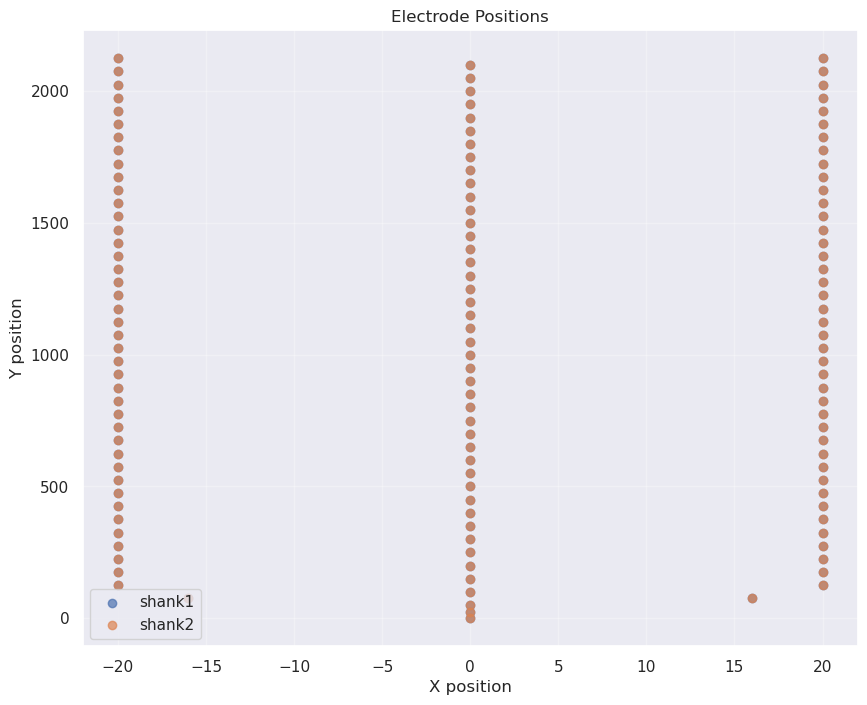

In [10]:
# Visualize electrode positions
plt.figure(figsize=(10, 8))
for group_name in electrodes_df['group_name'].unique():
    group_data = electrodes_df[electrodes_df['group_name'] == group_name]
    plt.scatter(group_data['x'], group_data['y'], label=group_name, alpha=0.7)

plt.title('Electrode Positions')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Electrophysiological Recording Data

Let's look at the structure of the electrophysiological data:

In [11]:
# Get information about the electrophysiological data
time_series = nwb.acquisition['time_series']
print(f"Data shape: {time_series.data.shape}")
print(f"Sampling rate: {time_series.rate} Hz")
print(f"Unit: {time_series.unit}")
print(f"Starting time: {time_series.starting_time} {time_series.starting_time_unit}")

# Calculate recording duration
duration_seconds = time_series.data.shape[0] / time_series.rate
duration_minutes = duration_seconds / 60
print(f"Total recording duration: {duration_seconds:.2f} seconds ({duration_minutes:.2f} minutes)")

Data shape: (144675584, 256)
Sampling rate: 30000.0 Hz
Unit: mV
Starting time: 0.0 seconds
Total recording duration: 4822.52 seconds (80.38 minutes)


### Visualizing Raw Electrophysiology Data

Let's visualize a small segment of raw electrophysiology data from a few channels:

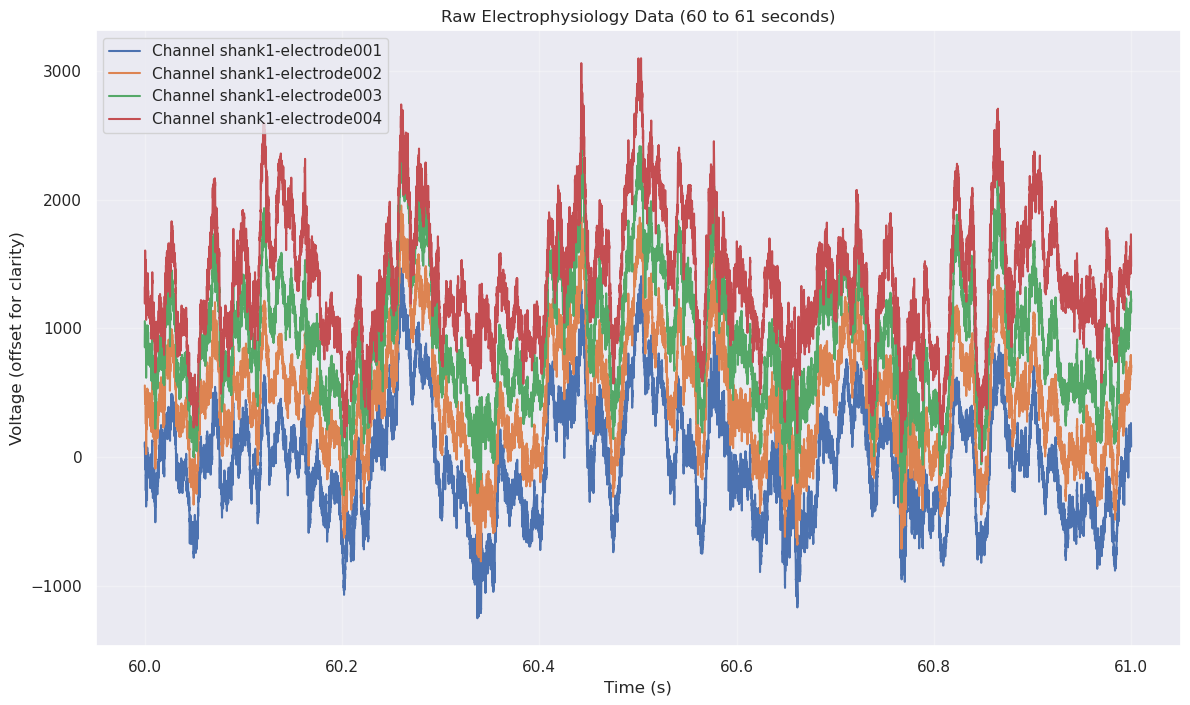

In [12]:
# Select a small segment of data from a few channels for visualization
start_time = 60  # seconds
segment_duration = 1  # seconds
start_index = int(start_time * time_series.rate)
end_index = start_index + int(segment_duration * time_series.rate)

# Select the first 4 channels for visualization
channel_indices = [0, 1, 2, 3]
channel_data = time_series.data[start_index:end_index, channel_indices]

# Create a time vector for the x-axis
time_vector = np.linspace(start_time, start_time + segment_duration, channel_data.shape[0])

# Plot the data
plt.figure(figsize=(14, 8))
for i, channel_idx in enumerate(channel_indices):
    # Get the electrode label for the channel
    electrode_label = electrodes_df.iloc[channel_idx]['label']
    plt.plot(time_vector, channel_data[:, i] + i*500, label=f"Channel {electrode_label}")

plt.title(f"Raw Electrophysiology Data ({start_time} to {start_time + segment_duration} seconds)")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (offset for clarity)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Trial Information

The dataset contains information about trials (laps) that the mouse completed in the virtual hallway. Let's explore this information:

In [13]:
# Get trial information
trials_df = nwb.trials.to_dataframe()
print(f"Number of trials: {len(trials_df)}")

# Display the first few trials
trials_df.head()

Number of trials: 387


,start_time,stop_time
id,,
0,4.323800,16.929833
1,16.963067,28.414333
2,28.447100,39.402833
3,39.435833,50.027033
4,50.059667,63.064467


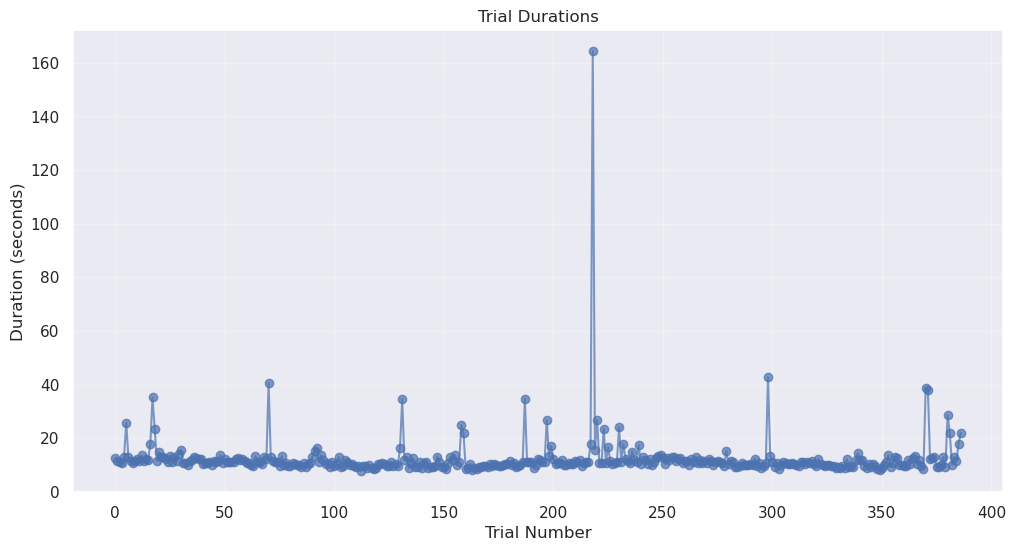

In [14]:
# Calculate trial durations
trials_df['duration'] = trials_df['stop_time'] - trials_df['start_time']

# Plot trial durations
plt.figure(figsize=(12, 6))
plt.plot(trials_df.index, trials_df['duration'], 'o-', alpha=0.7)
plt.title('Trial Durations')
plt.xlabel('Trial Number')
plt.ylabel('Duration (seconds)')
plt.grid(True, alpha=0.3)
plt.show()

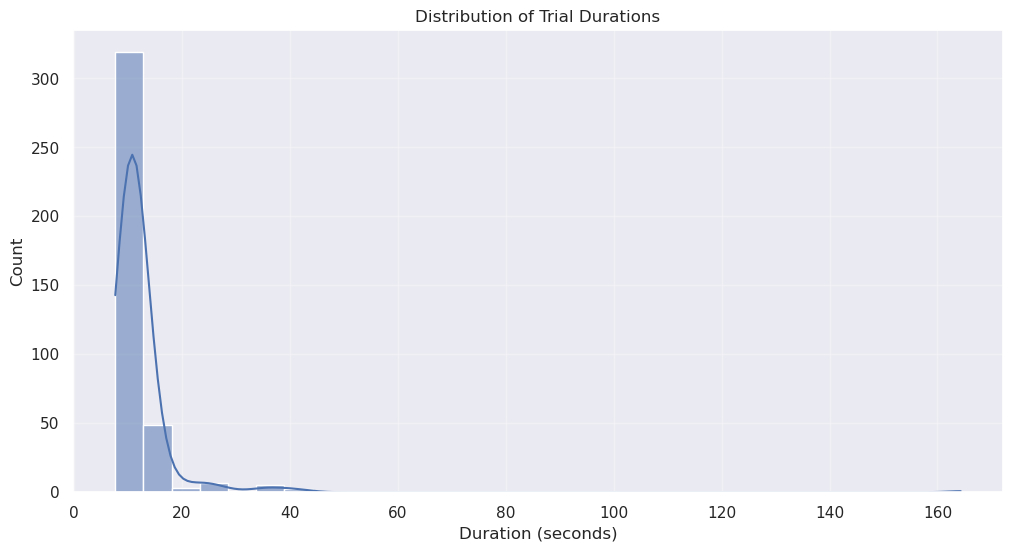

In [15]:
# Histogram of trial durations
plt.figure(figsize=(12, 6))
sns.histplot(trials_df['duration'], bins=30, kde=True)
plt.title('Distribution of Trial Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

### Unit (Neuron) Spiking Activity

Let's explore the spiking activity of neurons recorded in this dataset:

In [16]:
# Get unit information
units_df = nwb.units.to_dataframe()
print(f"Number of units: {len(units_df)}")

# Display the first few units
units_df.head()

Number of units: 33


,spike_times
id,
1,"[3.5485, 3.5543666666666667, 3.784666666666667..."
2,"[0.1826, 0.21976666666666667, 0.77823333333333..."
3,"[0.005533333333333334, 0.01633333333333333, 0...."
4,"[0.5452333333333333, 0.5632, 0.572833333333333..."
5,"[0.07036666666666666, 0.1002, 0.17066666666666..."


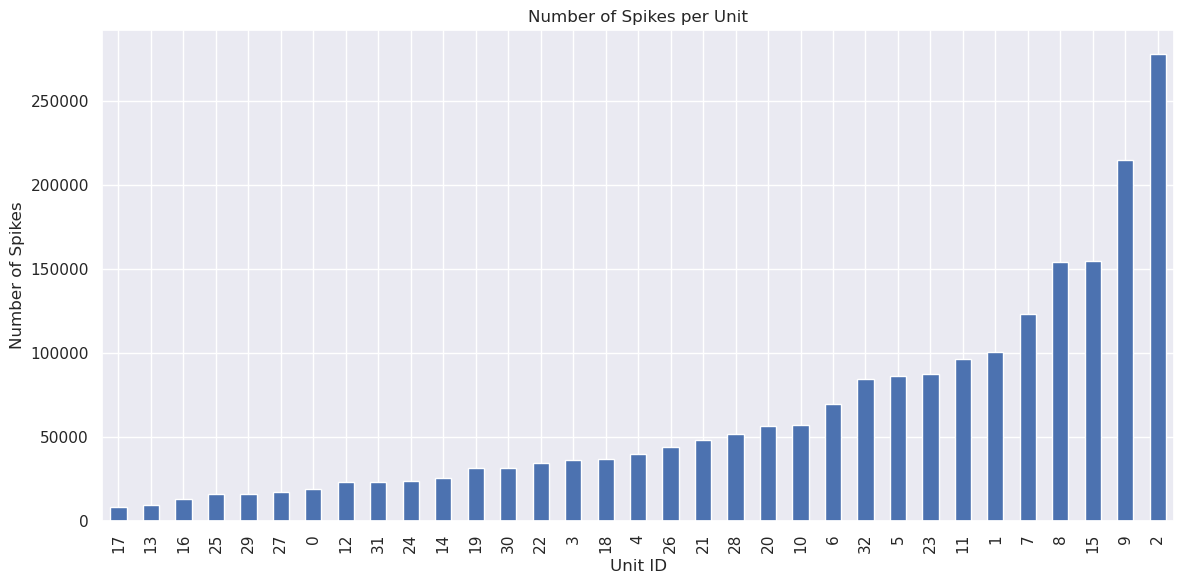

In [17]:
# Get spike times for each unit
spike_times_dict = {}
# Safer approach: use the range of valid indices for nwb.units
for i in range(len(nwb.units)):
    spike_times_dict[i] = nwb.units['spike_times'][i]

# Count spikes per unit
spike_counts = {unit_id: len(times) for unit_id, times in spike_times_dict.items()}
units_df = units_df.reset_index(drop=True)  # Reset index to match unit IDs
units_df['spike_count'] = pd.Series(spike_counts)

# Plot spike counts per unit
plt.figure(figsize=(12, 6))
units_df['spike_count'].sort_values().plot(kind='bar')
plt.title('Number of Spikes per Unit')
plt.xlabel('Unit ID')
plt.ylabel('Number of Spikes')
plt.tight_layout()
plt.show()

### Visualizing Spiking Activity

Let's create a raster plot to visualize the spiking activity of a few units:

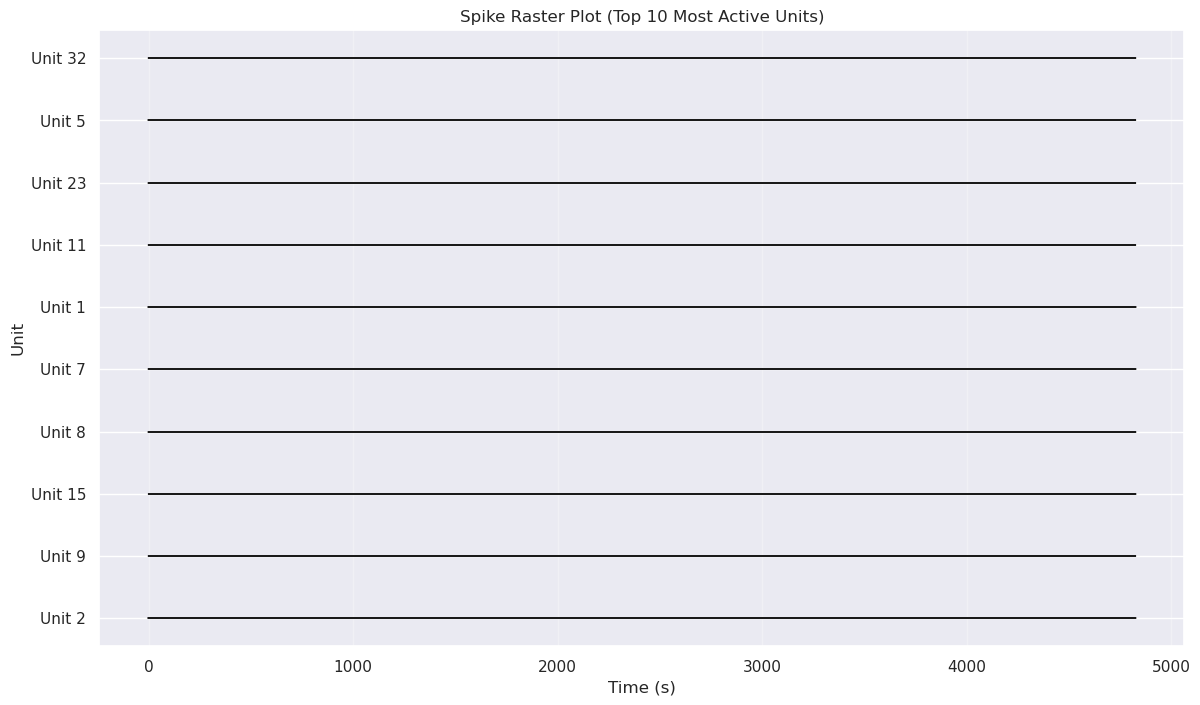

In [18]:
# Select a subset of units for visualization (top 10 by spike count)
selected_units = units_df.sort_values('spike_count', ascending=False).head(10).index.tolist()

# Create a raster plot for the selected units
plt.figure(figsize=(14, 8))
for i, unit_id in enumerate(selected_units):
    spike_times = nwb.units['spike_times'][unit_id]
    # If there are too many spikes, sample a subset to avoid performance issues
    if len(spike_times) > 10000:
        # Randomly sample 10,000 spikes
        spike_times = np.random.choice(spike_times, 10000, replace=False)
    plt.scatter(spike_times, np.ones_like(spike_times) * i, marker='|', s=2, color='k')

plt.title('Spike Raster Plot (Top 10 Most Active Units)')
plt.xlabel('Time (s)')
plt.yticks(range(len(selected_units)), [f'Unit {id}' for id in selected_units])
plt.ylabel('Unit')
plt.grid(True, axis='x', alpha=0.3)
plt.show()

### Visualizing Spiking Activity During Trials

Let's examine how neurons fire during specific trials:

Analyzing trial 10:
  Start time: 135.47 seconds
  End time: 147.71 seconds
  Duration: 12.24 seconds


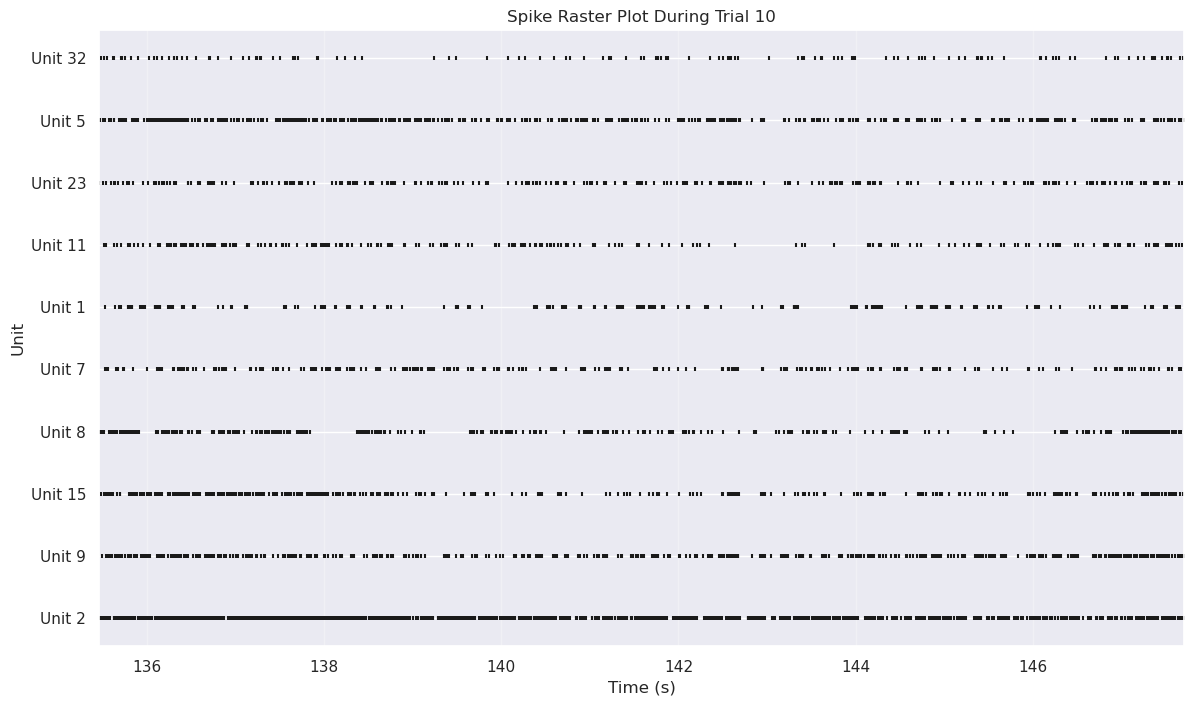

In [19]:
# Select a specific trial to analyze
trial_idx = 10  # Arbitrary choice for demonstration
trial_start = trials_df.iloc[trial_idx]['start_time']
trial_end = trials_df.iloc[trial_idx]['stop_time']
trial_duration = trial_end - trial_start

print(f"Analyzing trial {trial_idx}:")
print(f"  Start time: {trial_start:.2f} seconds")
print(f"  End time: {trial_end:.2f} seconds")
print(f"  Duration: {trial_duration:.2f} seconds")

# Create a raster plot for the selected units during this trial
plt.figure(figsize=(14, 8))
for i, unit_id in enumerate(selected_units):
    spike_times = nwb.units['spike_times'][unit_id]
    # Select only spikes within the trial
    trial_spikes = spike_times[(spike_times >= trial_start) & (spike_times <= trial_end)]
    plt.scatter(trial_spikes, np.ones_like(trial_spikes) * i, marker='|', s=5, color='k')

plt.title(f'Spike Raster Plot During Trial {trial_idx}')
plt.xlabel('Time (s)')
plt.yticks(range(len(selected_units)), [f'Unit {id}' for id in selected_units])
plt.ylabel('Unit')
plt.xlim(trial_start, trial_end)
plt.grid(True, axis='x', alpha=0.3)
plt.show()

### Advanced Visualization: Combining Electrophysiology and Spiking Data

Let's create a more advanced visualization that combines raw electrophysiology data with spiking activity:

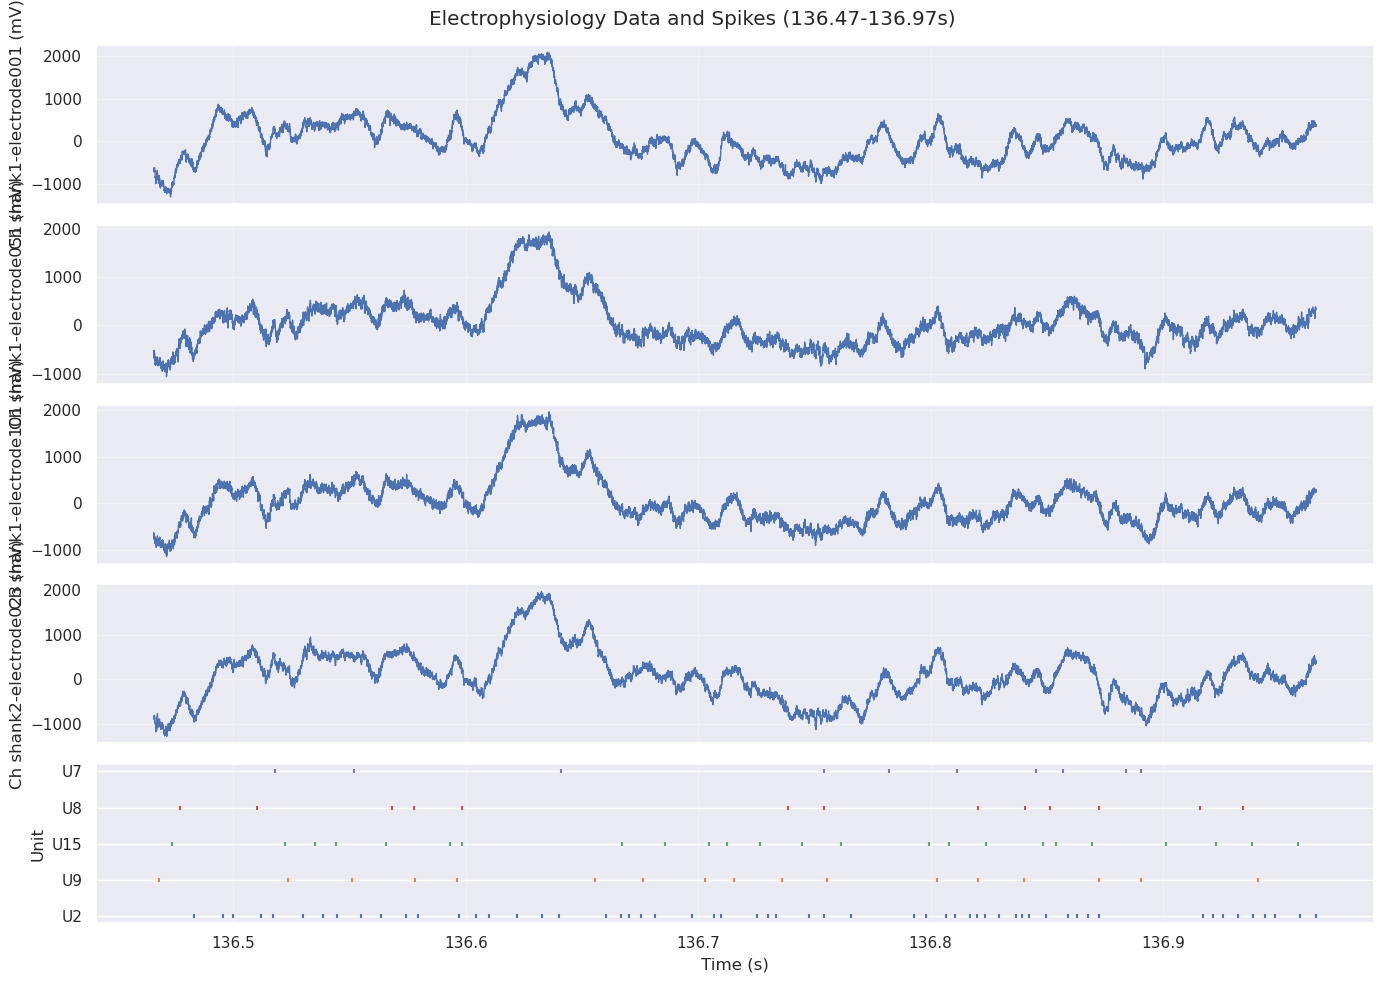

In [20]:
# Select a small time window for visualization
start_time = trial_start + 1  # 1 second into the trial
window_size = 0.5  # 0.5 seconds
end_time = start_time + window_size

# Convert times to indices
start_idx = int(start_time * time_series.rate)
end_idx = int(end_time * time_series.rate)

# Select a few channels to display
channel_indices = [0, 50, 100, 150]
channel_data = time_series.data[start_idx:end_idx, channel_indices]

# Create a time vector for the x-axis
time_vector = np.linspace(start_time, end_time, channel_data.shape[0])

# Create the figure with multiple subplots
fig, axes = plt.subplots(len(channel_indices) + 1, 1, figsize=(14, 10), sharex=True)

# Plot the electrophysiology data in the top panels
for i, channel_idx in enumerate(channel_indices):
    electrode_label = electrodes_df.iloc[channel_idx]['label']
    axes[i].plot(time_vector, channel_data[:, i], lw=1)
    axes[i].set_ylabel(f'Ch {electrode_label} (mV)')
    axes[i].grid(True, alpha=0.3)

# Plot spike raster in the bottom panel
for i, unit_id in enumerate(selected_units[:5]):  # Limit to first 5 units for clarity
    spike_times = nwb.units['spike_times'][unit_id]
    # Select only spikes within the window
    window_spikes = spike_times[(spike_times >= start_time) & (spike_times <= end_time)]
    if len(window_spikes) > 0:
        axes[-1].scatter(window_spikes, np.zeros_like(window_spikes) + i, marker='|', s=10, label=f'Unit {unit_id}')

axes[-1].set_xlabel('Time (s)')
axes[-1].set_ylabel('Unit')
axes[-1].set_yticks(range(min(5, len(selected_units))))
axes[-1].set_yticklabels([f'U{id}' for id in selected_units[:5]])
axes[-1].grid(True, axis='x', alpha=0.3)

plt.suptitle(f'Electrophysiology Data and Spikes ({start_time:.2f}-{end_time:.2f}s)')
plt.tight_layout()
plt.show()

### Analyzing Spiking Patterns

Let's compute and visualize the firing rates of neurons during the recording:

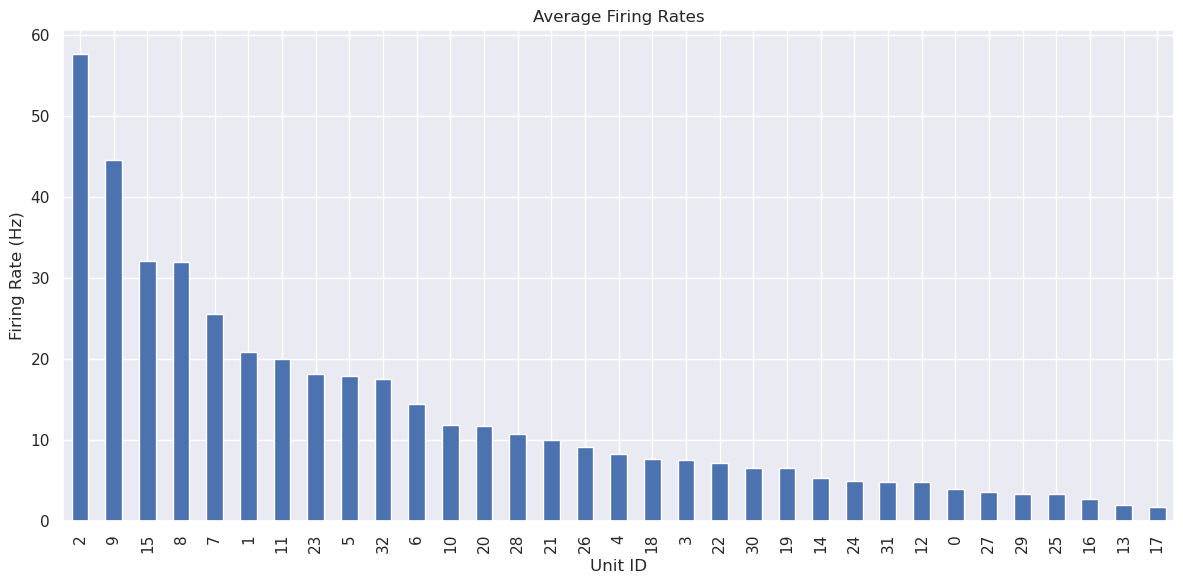

In [21]:
# Compute average firing rates (spikes per second) for all units
recording_duration = time_series.data.shape[0] / time_series.rate  # in seconds
units_df['firing_rate'] = units_df['spike_count'] / recording_duration

# Plot the firing rates of all units
plt.figure(figsize=(12, 6))
units_df['firing_rate'].sort_values(ascending=False).plot(kind='bar')
plt.title('Average Firing Rates')
plt.xlabel('Unit ID')
plt.ylabel('Firing Rate (Hz)')
plt.tight_layout()
plt.show()

## Summary and Future Directions

In this notebook, we've explored Dandiset 001375, which contains electrophysiological data from experiments investigating the effect of disrupting septal GABAergic activity using DREADDs on hippocampal and neocortical activity.

### Key Findings:

1. The dataset contains 3 NWB files with electrophysiological recordings from mice running laps in a virtual hallway.
2. We focused on data from subject MS13B, which includes:
   - Raw electrophysiology data from 256 channels
   - 387 trials (laps) with varying durations
   - Spiking activity from 33 units (neurons)
3. We visualized the raw electrophysiology data, trial structure, and spiking activity, providing insights into the neural activity during the experiments.

### Future Directions:

To further analyze this dataset, you might consider:

1. **Comparing baseline and DREADD conditions**: The dataset includes data from experiments with DREADD-mediated suppression of GABAergic interneurons. A more comprehensive analysis could compare neural activity before and after DREADD activation.

2. **Analyzing spatial coding**: Since the recordings were made while mice ran laps in a virtual hallway, you could analyze how neural activity relates to spatial location in the virtual environment.

3. **Cross-animal comparison**: The dataset includes recordings from multiple animals. Comparing neural activity patterns across animals could provide insights into individual differences and the consistency of DREADD effects.

4. **Spectral analysis**: Analyzing the frequency content of the raw electrophysiology data could reveal oscillatory patterns associated with different brain states or behaviors.

5. **Trial-averaged analysis**: Computing trial-averaged responses could help identify consistent patterns of neural activity associated with specific task events or phases.

This dataset provides a rich resource for investigating the role of septal GABAergic neurons in regulating hippocampal and neocortical activity, which is crucial for understanding the neural mechanisms underlying cognitive processes such as memory and navigation.